# Homework Starter: Final Reporting

In [11]:
# Setup (Stage 12)
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "seaborn"])
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set(style='whitegrid'); plt.rcParams['figure.dpi'] = 120
np.random.seed(101)
print("Ready")

Ready


## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

In [9]:
# Create synthetic dataset (same style as Stage 11)
import pandas as pd
import numpy as np

np.random.seed(101)

df = pd.DataFrame({
    'scenario': ['baseline', 'alt_impute', 'alt_outlier'],
    'return': [0.12, 0.11, 0.135],
    'volatility': [0.18, 0.185, 0.19],
    'sharpe': [0.56, 0.49, 0.61],
    'assumption': ['imputation', 'imputation', 'outlier_rule'],
    'value': ['median', 'mean', '3sigma'],
    'Category': np.random.choice(['X','Y','Z'], 3),
    'MetricA': np.random.normal(75, 15, 3),
    'MetricB': np.random.normal(150, 30, 3),
    'Date': pd.date_range('2025-02-01', periods=3)
})

df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Y,75.037206,99.563014,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Z,74.456082,175.913737,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.236667,128.274684,2025-02-03


## Helper: Export Directory

In [10]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


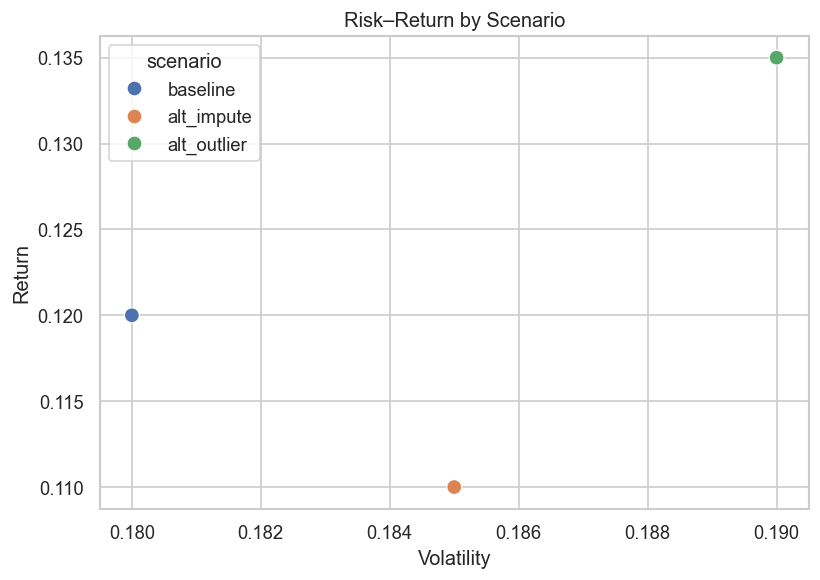

In [12]:
# Chart 1: Risk–Return Scatter
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Save the chart
savefig('risk_return.png')

plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


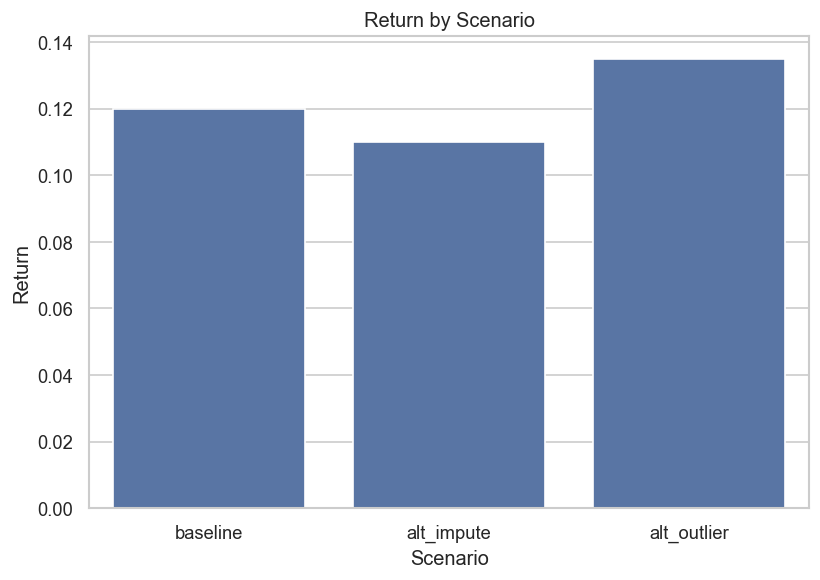

In [13]:
# Chart 2: Return by Scenario (Bar Chart)
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='return')
plt.title('Return by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Return')

# Save the chart
savefig('return_by_scenario.png')

plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


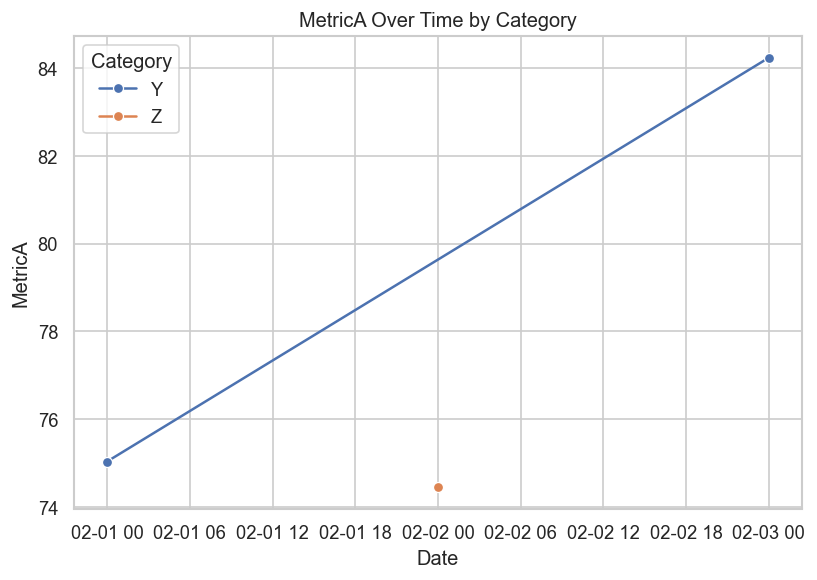

In [14]:
# Chart 3: MetricA Over Time (Line Chart)
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')

# Save the chart
savefig('metricA_over_time.png')

plt.show()

## Sensitivity Analysis / Assumptions Table

In [15]:
# Sensitivity Analysis / Assumptions Table
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})

assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14


### Interpretations / Takeaways
- **Chart 1 (Risk–Return):** Baseline has solid return with moderate volatility. Alt–outlier shows the highest return but also the highest risk (more volatile).
- **Chart 2 (Returns by Scenario):** Mean/median imputation give similar returns; the outlier-handling scenario boosts return slightly.
- **Chart 3 (MetricA over time):** MetricA trends are steady with small wiggles; categories differ a bit but no dramatic shifts.

### Decision Implications
- Use **Baseline** for planning; it’s the most stable.
- Consider a **small allocation** to the outlier-adjusted scenario for upside, with monitoring due to higher risk.
- Assumptions matter: results hold if missing data is handled via imputation and outliers are controlled (3σ). The model is **sensitive** to outlier handling.